# Stock Trend Prediction

## Importing necessary libraries

In [1]:
import pandas as pd
import pandas_datareader as data
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

## Importing real time yahoo finance data set for the years 2010 to 2019

In [2]:
start='2012-01-01'
end='2022-12-31'
symbol='AAPL'

df=yf.download(symbol, start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466094,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533087,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672231,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804700,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784389,394024400


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477585,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504539,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.059372,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.378006,77034200


In [4]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466094,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533087,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672231,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804700,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784389,394024400


## Dropping unecessary columns

In [5]:
df=df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400


## Checking for null values

In [6]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## Checking for any NaN values

In [7]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

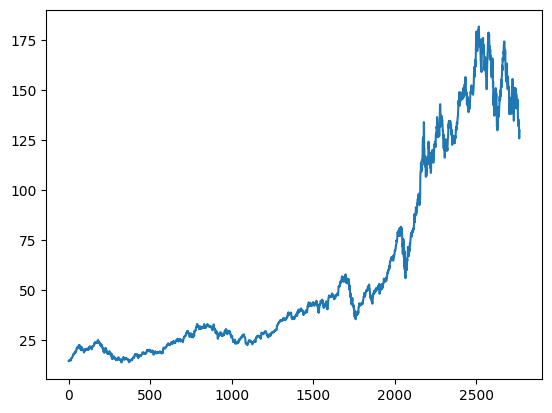

In [8]:
plt.plot(df.Close)

## Calculating 100 days moving average

In [9]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    150.515600
2764    150.157800
2765    149.764699
2766    149.412100
2767    149.062199
Name: Close, Length: 2768, dtype: float64

## Ploting 100 days moving average and closing prices

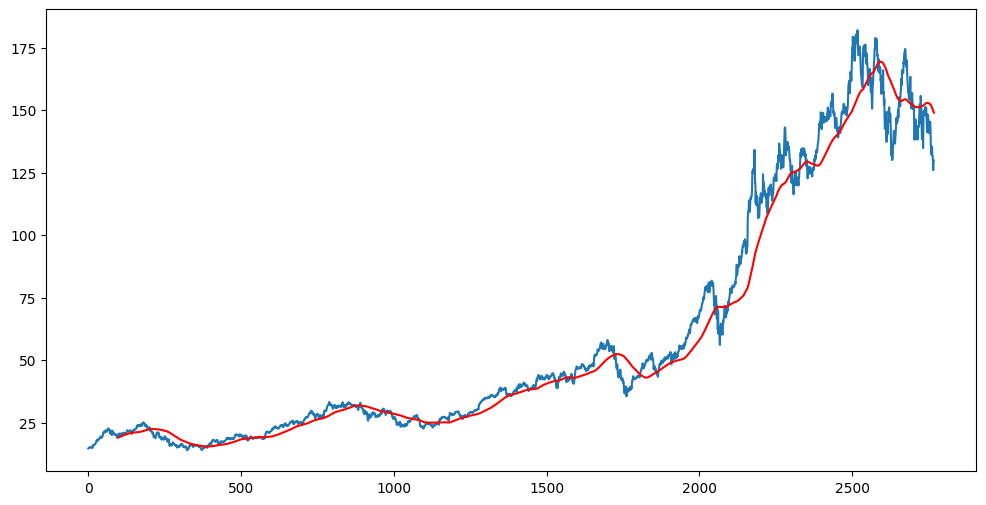

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, color='r')
plt.show()

## Calculating 200 days moving average

In [11]:
ma200=df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2763    152.1331
2764    152.0096
2765    151.8867
2766    151.7593
2767    151.6110
Name: Close, Length: 2768, dtype: float64

## Plotting 100 days, 200 days moving average and closing prices

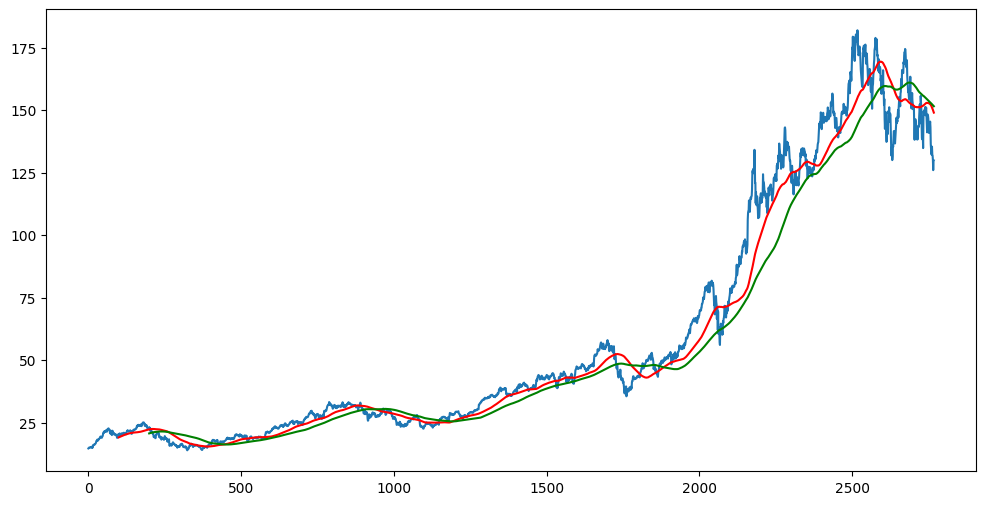

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, color='r')
plt.plot(ma200, color='g')
plt.show()

## Splitting data into training and testing sets

In [13]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [14]:
data_training.head()

,Close
0,14.686786
1,14.765714
2,14.929643
3,15.085714
4,15.061786


In [15]:
data_testing.head()

,Close
1937,54.974998
1938,55.174999
1939,55.692501
1940,55.240002
1941,54.432499


## Scaling the data between 0 and 1 for uniformity

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0, 1))
data_training_array=scaler.fit_transform(data_training)
print(data_training_array)

[[0.01677525]
 [0.01856622]
 [0.02228596]
 ...
 [0.95189465]
 [0.94905826]
 [0.92443835]]


## Create training data (x_train) for prediction (y_train)

In [17]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])
x_train, y_train=np.array(x_train), np.array(y_train)

In [18]:
x_train.shape

(1837, 100, 1)

## Creating LSTM model using keras and tensorflow

In [19]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [20]:
model=Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

## Compile and train the model

In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
58/58 [==============================] - 16s 185ms/step - loss: 0.0342
Epoch 2/50
58/58 [==============================] - 9s 153ms/step - loss: 0.0096
Epoch 3/50
58/58 [==============================] - 8s 130ms/step - loss: 0.0072
Epoch 4/50
58/58 [==============================] - 8s 138ms/step - loss: 0.0072
Epoch 5/50
58/58 [==============================] - 8s 129ms/step - loss: 0.0066
Epoch 6/50
58/58 [==============================] - 7s 125ms/step - loss: 0.0066
Epoch 7/50
58/58 [==============================] - 8s 137ms/step - loss: 0.0062
Epoch 8/50
58/58 [==============================] - 8s 137ms/step - loss: 0.0054
Epoch 9/50
58/58 [==============================] - 8s 146ms/step - loss: 0.0052
Epoch 10/50
58/58 [==============================] - 8s 142ms/step - loss: 0.0056
Epoch 11/50
58/58 [==============================] - 8s 131ms/step - loss: 0.0054
Epoch 12/50
58/58 [==============================] - 8s 133ms/step - loss: 0.0050
Epoch 13/50
58/58 [=====

## Save the model as a file as we have to access it in the future to make the website

In [23]:
model.save('keras_model.keras')

## Predicting data with testing dataset

In [24]:
past_100_days=data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df.head()

,Close
0,51.790001
1,51.320000
2,51.075001
3,51.152500
4,50.167500


In [25]:
input_data=scaler.fit_transform(final_df)

In [26]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [27]:
x_test, y_test=np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


In [28]:
#Making predictions

y_predicted=model.predict(x_test)

26/26 [==============================] - 1s 38ms/step


In [29]:
y_predicted.shape

(831, 1)

In [30]:
#Scaling up the predicted and testing values to their original values

scaler=scaler.scale_

## Scaling back up the data to regain original values

In [31]:
scale_factor=1/scaler[0]
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

In [32]:
y_test.shape

(831,)

## Plotting Original vs Predicted Stock trends

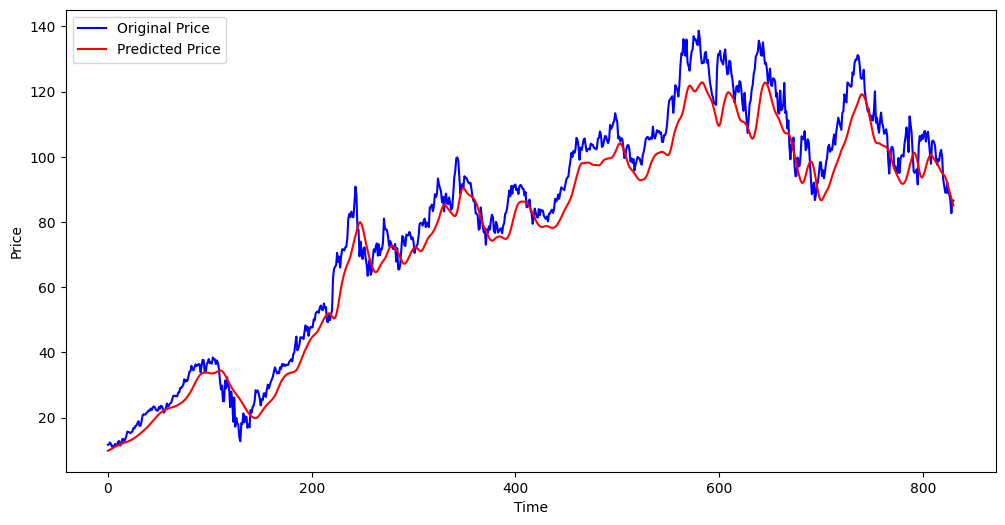

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, color='b', label='Original Price')
plt.plot(y_predicted, color='r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Predictions for 30 days into the future

In [34]:
#To predict future data, we are taking samples from 100 days before the current date

start_date=(datetime.now()-timedelta(days=100)).strftime('%Y-%m-%d')
end_date=datetime.now().strftime('%Y-%m-%d')

In [35]:
symbol='AAPL'

new_data=yf.download(symbol, start=start_date, end=end_date)
new_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-30,176.960007,178.990005,176.570007,177.300003,177.060898,55964400
2023-05-31,177.330002,179.350006,176.759995,177.250000,177.010971,99625300
2023-06-01,177.699997,180.119995,176.929993,180.089996,179.847137,68901800
2023-06-02,181.029999,181.779999,179.259995,180.949997,180.705978,61945900
2023-06-05,182.630005,184.949997,178.039993,179.580002,179.337830,121946500


In [36]:
new_data=new_data.reset_index()
new_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-30,176.960007,178.990005,176.570007,177.300003,177.060898,55964400
1,2023-05-31,177.330002,179.350006,176.759995,177.250000,177.010971,99625300
2,2023-06-01,177.699997,180.119995,176.929993,180.089996,179.847137,68901800
3,2023-06-02,181.029999,181.779999,179.259995,180.949997,180.705978,61945900
4,2023-06-05,182.630005,184.949997,178.039993,179.580002,179.337830,121946500


In [37]:
new_data=new_data.drop(['Date', 'Adj Close'], axis=1)
new_data.head()

,Open,High,Low,Close,Volume
0,176.960007,178.990005,176.570007,177.300003,55964400
1,177.330002,179.350006,176.759995,177.250000,99625300
2,177.699997,180.119995,176.929993,180.089996,68901800
3,181.029999,181.779999,179.259995,180.949997,61945900
4,182.630005,184.949997,178.039993,179.580002,121946500


In [38]:
new_data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [39]:
new_data.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## Scaling and normalization of data

In [40]:
from sklearn.preprocessing import MinMaxScaler
new_scaler=MinMaxScaler(feature_range=(0, 1))
new_data_training_array=new_scaler.fit_transform(pd.DataFrame(new_data['Close']))
print(new_data_training_array)

[[0.14699347]
 [0.14476617]
 [0.27126936]
 [0.30957674]
 [0.24855245]
 [0.2320716 ]
 [0.17015625]
 [0.2926507 ]
 [0.31002261]
 [0.43607994]
 [0.41469928]
 [0.44320705]
 [0.53496642]
 [0.48641424]
 [0.49042298]
 [0.44365292]
 [0.57906467]
 [0.56481044]
 [0.50200471]
 [0.6262806 ]
 [0.6792874 ]
 [0.694432  ]
 [0.88953247]
 [0.82227213]
 [0.77193783]
 [0.79331848]
 [0.74298418]
 [0.65077963]
 [0.62717166]
 [0.70245017]
 [0.73674813]
 [0.74343005]
 [0.89042353]
 [0.8788418 ]
 [0.93986677]
 [0.85211615]
 [0.79910935]
 [0.83518942]
 [0.87394199]
 [0.91314044]
 [0.85612489]
 [0.97238329]
 [1.        ]
 [0.96258368]
 [0.82761712]
 [0.76481071]
 [0.3559023 ]
 [0.21603594]
 [0.25835206]
 [0.18663711]
 [0.17683749]
 [0.16881932]
 [0.24320746]
 [0.15367472]
 [0.11447696]
 [0.        ]
 [0.02182653]
 [0.08195976]
 [0.14387511]
 [0.31714905]
 [0.10601359]
 [0.20534527]
 [0.27572398]
 [0.45077935]
 [0.60801763]
 [0.61781724]
 [0.68864182]]


In [41]:
x_test_new=[new_data_training_array[-100:]]
x_test_new=np.array(x_test_new)
x_test_new.shape

(1, 67, 1)

In [42]:
new_scaler=new_scaler.scale_

In [43]:
scale_factor_new=1/new_scaler[0]
predicted_prices=[]

# Predict next 30 days
for i in range(30):
    y_predicted_new=model.predict(x_test_new)
    y_predicted_new=y_predicted_new*scale_factor_new
    
    # Append the prediction and remove the oldest data point
    x_test_new=np.append(x_test_new, y_predicted_new[-1])  
    x_test_new=x_test_new[1:]
    x_test_new = x_test_new.reshape(1, -1, 1)

    #Converting shape of x_test_new from (1, 67, 1) to lstm accepted shape (1, 100, 1)
    desired_sequence_length = 100

    if x_test_new.shape[1] < desired_sequence_length:
        padding_width = desired_sequence_length - x_test_new.shape[1]
        zero_padding = np.zeros((x_test_new.shape[0], padding_width, x_test_new.shape[2]))
        x_test_new = np.concatenate((zero_padding, x_test_new), axis=1)
    elif x_test_new.shape[1] > desired_sequence_length:
    # If the sequence is longer, you can truncate it to the desired length
        x_test_new = x_test_new[:, :desired_sequence_length, :]

    predicted_prices.append(y_predicted_new[-1])

1/1 [==============================] - 0s 28ms/step


## Convert predicted_prices to a DataFrame with dates

In [44]:
date_rng=pd.date_range(start=end_date, periods=30, freq='D')
predicted_df=pd.DataFrame({'Date':date_rng, 'Predicted Price':predicted_prices})

## Plotting Closing price vs date for the next 30 days

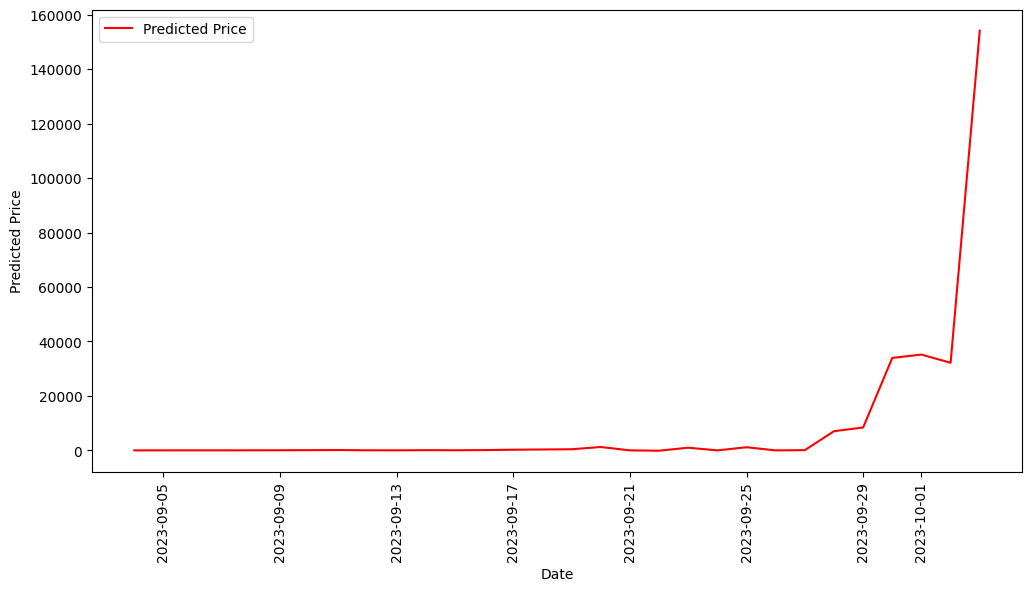

In [45]:
date_values = predicted_df['Date'].values
predicted_price_values = predicted_df['Predicted Price'].values

plt.figure(figsize=(12, 6))
plt.plot(date_values, predicted_price_values, color='r', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Predicted Price')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()